# Algoritmos, Convergencia, Estabilidad

# **<font color="DodgerBlue">Quizz 2. </font>**

<div class="alert alert-info" role="alert">
    
# Instrucciones. 
1. Cada ejercicio se describe en una celda de texto de tipo <i>read-only</i> (que no se puede modificar).
2. En las celdas posteriores a la descripción de cada ejercicio encontrarás celdas con el texto:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
3. Cuando ya estés listo para completar el ejercicio, debes eliminar el texto <font color="Green"><b>raise</b></font> <font color="black">NotImplementedError()</font> y enseguida escribir tu respuesta.
4. Una vez que completes tu respuesta, deberás ejecutar la celda donde hiciste la implementación.
5. Posteriormente encontrarás celdas de tipo <i>read-only</i> con un texto similar al siguiente:
```python
quizz.eval_numeric('1a',w)
```
6. Cuando ejecutes este tipo de celdas, obtendrás retroalimentación sobre el ejercicio que acabas de completar.
7. En caso de que tu respuesta no sea correcta, obtendrás una ayuda para realizar el ejercicio correctamente. En dicho caso, deberás regresar al lugar donde escribiste tu respuesta, corregir y volver a ejecutar las celdas correspondientes para revisar el nuevo resultado.
8. Siempre ejecuta todas las celdas que preceden al ejercicio, pues generalmente son requeridas para que todo funcione correctamente.
    
</div>

In [1]:
import numpy as np
import ipywidgets as widgets
import macti.visual as mvis


<font color="DarkBlue">
<ol>
<li> La siguiente Ecuación Diferencial Ordinaria
$$
\frac{d}{dt}y(t) = -a y(t), \;\; y(0) = 1, \;\; a > 0, \;\; \forall t \tag{1}
$$
tiene la solución analítica: $y(t) = e^{-at}$ la cual se puede aproximar mediante el siguiente algoritmo:

---
1. Condición inicial:
$$y_0 = 1.0$$

2. Para $n=0,1,2, \dots, N$, evaluar:
$$
y_{n+1} = (1 - a \delta t ) y_n \tag{2}
$$
--- 
El la siguiente celda de código, completa el algoritmo con lo siguiente:

<ul>
<li> El cálculo de la solución exacta.</li>
<li> La inicialización de la condición inicial.</li>
<li> El ciclo para evaluar la relación de recurrencia descrita en $(2)$.</li>
<li> El cálculo del error absoluto.</li>
</ul>

Ejecuta la función para: $a = 0.5$ y $\delta t = 0.2$ y checa que tu resultado sea correcto.
</li>
</ol>
</font>


In [2]:
def ode_num(a, dt, sol = True):
    t = np.arange(0.0, 10.0, dt)
    N = len(t)
    yn = np.zeros(N)
    er = np.zeros(N)

    ### BEGIN SOLUTION
    y = np.exp(-a * t)
    yn[0] = 1.0
    for i in range(1,N):
        yn[i] = (1 - a * dt) * yn[i-1]
        er[i] = np.abs(y[i] - yn[i])
    ### END SOLUTION
    # y = ...
    # yn[0] = ...
    # for i in range( ...):
    #     ...
    
    # Graficación
    vis = mvis.Plotter(1,2,[dict(title = "$y(t) = e^{-at}$", xlabel='$t$'),
                           dict(title="Error", xlabel='$t$')], 
                       dict(figsize=(10,4)))

    vis.plot(1, t, y,  marker='o', alpha=0.75, label='Exacta')
    vis.plot(1, t, yn, marker='s', alpha=0.75, label='Numérica')
    vis.plot(2, t, er, marker='o', color='C2', label='Error absoluto')

    vis.figtitle('Solución para $a$ = {}'.format(a))
    vis.grid()
    vis.legend()
    vis.show()
    
    if sol:
        return y, yn, er

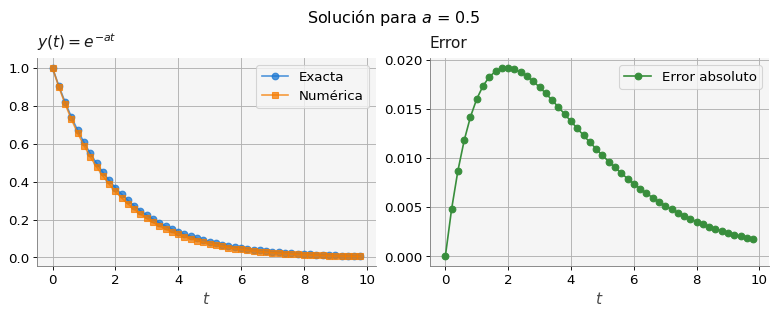

In [3]:
y_exa, y_num, error = ode_num(0.5, 0.2)

<font color="DarkBlue">
<ol start="2">
<li> Construye un interactivo usando la función <b>ode_num()</b> y responde lo siguiente:

<ol>
<li> Para $a=1.0$, ¿cuál es valor máximo de $\delta t$ con el que se obtienen solo valores positivos en la solución numérica?(1.0)</li> 
<li> Para $a=1.0$, $\delta t = 2.0$ ¿cuáles son los valores máximo y mínimo que toma la solución numérica?(1, -1)</li> 
<li> Para $a=4.0$, ¿cuál es valor de $\delta t$ que produce una solución que oscila entre $1$ y $-1$? (0.5)</li>
<li> Para $a=4.0$, ¿cuál es valor máximo de $\delta t$ que produce una solución numérica que oscila pero que va dismuyendo y al final converge a la solución exacta? (0.4)</li>
<li> Para $a=4.0$, ¿a partir de que valor de $\delta t$ la solución numérica comienza a crecer exponencialmente y sin control? (0.6) </li>
<li> Para $a=5.0$, ¿cuál es el error máximo que se obtiene con $\delta t = 2.0$? (6561.0) ()</li>
<li> Para $a=2.50$, ¿cuál es el valor mínimo de la solución numérica que se obtiene con $\delta t = 1.0$ redondeado a tres decimales? (-17.0859375)</li>
</ol>

<b>Hint</b>: para responder las últimas dos preguntas utiliza el argumento <b>sol = widgets.fixed(True)</b> en el interactivo y obtendrás los valores de $y$, $yn$ y $error$ al final del interactivo.
</li>
</ol>
</font>

In [4]:
w = widgets.interact(ode_num,          
                     a = widgets.FloatSlider(min=1, max=5, step=0.5, value=1, description="$a$"),
                     dt = widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=0.5, description="$\delta t$"),
                     sol = widgets.fixed(False))

display(w)

interactive(children=(FloatSlider(value=1.0, description='$a$', max=5.0, min=1.0, step=0.5), FloatSlider(value…

<function __main__.ode_num(a, dt, sol=True)>